### Hi there 👋 To connect Python with a local database
- you can use various libraries depending on the type of database you are working with. 
- Below are steps for connecting to different types of databases including MySQL, SQLite, and SQL Server.
- you can use the same SQL queries in both local and cloud databases, as long as the database engines (e.g., MySQL, PostgreSQL, SQLite) are the same.
- The query syntax doesn't change just because the database is hosted locally or in the cloud.

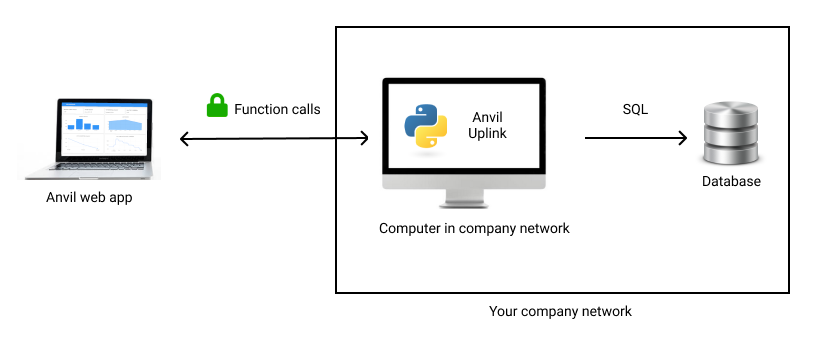

In [ ]:
import sqlite3
import mysql.connector
import psycopg2
from sqlalchemy import create_engine, Column, Integer, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

#### 1. SQLite (Lightweight and Built-in Database):

SQLite is included with Python, so no additional installation is necessary.

Steps:

    Import the sqlite3 module.
    Create a connection to the SQLite database file.
    Create a cursor object to execute SQL queries.

In [ ]:
# Connect to SQLite database (it will create the database file if it doesn't exist)
conn = sqlite3.connect('my_database.db')

# Create a cursor object
cursor = conn.cursor()

# Create a table
cursor.execute('''
CREATE TABLE IF NOT EXISTS users (
    id INTEGER PRIMARY KEY,
    name TEXT,
    age INTEGER
)
''')

# Insert data
cursor.execute('''
INSERT INTO users (name, age) VALUES (?, ?)
''', ('John Doe', 30))

# Commit the changes and close the connection
conn.commit()
conn.close()


#### 2. MySQL (Local or Remote Database):

Install the mysql-connector-python or pymysql library to connect Python with MySQL.

Installation:

    pip install mysql-connector-python
    
Steps:

    Install MySQL and create a local database.
    Use the library to connect to the database.
    Execute SQL queries.

In [ ]:
# Connect to the MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="your_password",
    database="my_database"
)

cursor = conn.cursor()

# Create a table
cursor.execute('''
CREATE TABLE IF NOT EXISTS users (
    id INT AUTO_INCREMENT PRIMARY KEY,
    name VARCHAR(255),
    age INT
)
''')

# Insert data
cursor.execute('''
INSERT INTO users (name, age) VALUES (%s, %s)
''', ('John Doe', 30))

# Commit changes and close the connection
conn.commit()
conn.close()


#### 3. PostgreSQL:

Install the psycopg2 library to connect Python with PostgreSQL.

Installation:

    pip install psycopg2

Steps:

    Install PostgreSQL and create a local database.
    Use psycopg2 to connect.

In [ ]:
# Connect to PostgreSQL database
conn = psycopg2.connect(
    dbname="my_database",
    user="postgres",
    password="your_password",
    host="localhost",
    port="5432"
)

cursor = conn.cursor()

# Create a table
cursor.execute('''
CREATE TABLE IF NOT EXISTS users (
    id SERIAL PRIMARY KEY,
    name VARCHAR(100),
    age INT
)
''')

# Insert data
cursor.execute('''
INSERT INTO users (name, age) VALUES (%s, %s)
''', ('John Doe', 30))

# Commit changes and close the connection
conn.commit()
conn.close()


#### 4. SQLAlchemy (For ORM and Multiple Databases):

SQLAlchemy provides a higher-level ORM and can connect to multiple database types.

Installation:

    pip install sqlalchemy

Example with SQLite:
    Install PostgreSQL and create a local database.
    Use SQLite to connect.

In [ ]:
# Define database engine
engine = create_engine('sqlite:///my_database.db')

# Define a base class
Base = declarative_base()

# Define a table as a Python class
class User(Base):
    __tablename__ = 'users'
    id = Column(Integer, primary_key=True)
    name = Column(String)
    age = Column(Integer)

# Create tables
Base.metadata.create_all(engine)

# Create a session
Session = sessionmaker(bind=engine)
session = Session()

# Add data
new_user = User(name="John Doe", age=30)
session.add(new_user)
session.commit()


1. SQLite (sqlite3)

    Pros:
        Built-in Python library; no installation required.
        Simple setup with databases stored as single files.
        Great for prototyping or small-scale projects.
        Easy-to-use syntax and compatible with ORMs like SQLAlchemy.
    Cons:
        Limited scalability; not ideal for large datasets or multi-user applications.
        Lacks advanced features like stored procedures and triggers.
        Risk of file corruption if the app crashes during a write operation.
    Best Use Case: Suitable for lightweight, file-based databases or quick development projects.

2. MySQL (mysql-connector or PyMySQL)

    Pros:
        Powerful and widely used for robust table operations.
        Supports advanced features like indexing, stored procedures, and triggers.
        Scalable for larger applications and multi-user environments.
    Cons:
        Requires installation and setup of a MySQL server, even for local use.
        Heavier compared to SQLite for simple, single-user projects.
        More complex to manage and configure.
    Best Use Case: Ideal for scalable applications requiring multi-user support and advanced table features.

3. PostgreSQL (psycopg2)

    Pros:
        Highly advanced, supports complex queries and high performance.
        Full ACID compliance ensures strong data integrity.
        Scalable and extensible, with support for plugins and custom functions.
    Cons:
        Requires a PostgreSQL server setup, which adds complexity.
        Slightly steeper learning curve compared to SQLite or MySQL.
        Overhead for small-scale or simple projects.
    Best Use Case: Best for projects needing advanced database features and complex data models.

4. SQLAlchemy (ORM)

    Pros:
        Abstracts database interactions, making it easier to handle tables with Python.
        Compatible with multiple database engines like SQLite, MySQL, and PostgreSQL.
        Provides built-in support for migrations, relationships, and queries.
    Cons:
        Adds complexity for simple applications.
        Slightly slower due to abstraction layers.
    Best Use Case: Scalable applications that benefit from ORM abstractions and need flexibility across databases.